Mapa del Peru Crucero 22-I

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install basemap-data
!apt install proj-bin libproj-dev libgeos-dev
!pip install Basemap

!pip install pyproj==1.9.6
from mpl_toolkits import basemap
print(basemap.__version__)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 30.5 MB 1.8 MB/s 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (34.0 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 862 kB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 

     |████████████████████████████████| 2.8 MB 4.2 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702467 sha256=9566c4333aa33f923b89cf828b0d6749ef02e3cc80457125522f9c82d6c281f4
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1
1.3.2


In [ ]:
#importar
import os
#from netCDF4 import Dataset
from datetime import date
import numpy as np
#from oceans.colormaps import cm
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/centinela/crucero_22-I

/content/drive/MyDrive/centinela/crucero_22-I


In [ ]:
#IMPORTAR DATOS DE CALAS CRUCERO.xlsx
fn="CALAS_CRUCERO.xlsx"

import pandas as pd
df= pd.read_excel(fn, sheet_name='CALAS BIOMETRIA ',header=0, usecols='B:O')
df

,EMPRESA,NAVE,dato,N° DE CALA,FECHA DE CALA,HORA DE CALA\nINICIO,HORA DE CALA\nFINAL,TSM (°C),DC,CAPTURA\ndeclarada(T),longitud\n(decimal),latitud\n(decimal),LATITUD PROM,MUESTRA (número de ejemplares-Anchoveta)
0,HAYDUK,LOMAS,25.0,1,2022-02-18,11:04:00,12:28:00,NaN,18.0,NaN,-80.800000,-3.500000,4,0
1,HAYDUK,LOMAS,25.0,2,2022-02-18,19:41:00,21:42:00,NaN,50.0,NaN,-81.683333,-3.666667,4,0
2,HAYDUK,LOMAS,25.0,3,2022-02-19,09:24:00,10:40:00,NaN,20.0,NaN,-81.150000,-3.816667,4,0
3,HAYDUK,LOMAS,25.0,4,2022-02-19,17:53:00,19:35:00,NaN,55.0,NaN,-81.900000,-4.000000,4,0
4,HAYDUK,LOMAS,25.0,5,2022-02-20,05:39:00,07:57:00,NaN,28.0,NaN,-81.533333,-4.150000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,CENTINELA,REGION CHAVIN IV,NaN,9,2022-03-12,18:55:00,20:28:00,21.1,75.0,0.0,-77.483333,-13.383333,13,0
150,CENTINELA,REGION CHAVIN IV,NaN,10,2022-03-13,06:10:00,07:57:00,20.7,75.3,0.0,-77.500000,-13.783333,14,0
151,CENTINELA,REGION CHAVIN IV,NaN,11,2022-03-13,17:29:00,19:07:00,21.5,77.7,0.0,-77.283333,-14.433333,14,0
152,CENTINELA,REGION CHAVIN IV,NaN,12,2022-03-15,00:05:00,01:20:00,22.1,88.0,0.0,-77.250000,-14.800000,15,0


In [ ]:
#Filtramos
barcos=df['NAVE'].unique()
#for kk in range(0,len(barcos),1):
EP= df[df['NAVE'] == barcos[2]]
EP

  # jj=-1
  # for ii in range(len(EP)):
  #   print(np.array(EP['MUESTRA (número de ejemplares-Anchoveta)'][jj]))
    # if np.array(EP['MUESTRA (número de ejemplares-Anchoveta)'][ii])==0:
    #   plt.plot(EP['longitud\n(decimal)'], EP['latitud\n(decimal)'],linewidth=0, marker='o', color='blue')
    # else:
    #   plt.plot(EP['longitud\n(decimal)'], EP['latitud\n(decimal)'],linewidth=0, marker='d', color='green')

#plt.plot(Guanay['longitud\n(decimal)'], Guanay['latitud\n(decimal)'], linestyle='dashed',linewidth=1)

,EMPRESA,NAVE,dato,N° DE CALA,FECHA DE CALA,HORA DE CALA\nINICIO,HORA DE CALA\nFINAL,TSM (°C),DC,CAPTURA\ndeclarada(T),longitud\n(decimal),latitud\n(decimal),LATITUD PROM,MUESTRA (número de ejemplares-Anchoveta)
57,TASA,TASA 427,45.0,1,2022-02-18,03:30:00,05:05:00,22.60,NaN,NaN,-81.733333,-3.483333,3,0
58,TASA,TASA 427,45.0,2,2022-02-18,15:00:00,16:05:00,27.30,12.0,NaN,-80.900000,-3.666667,4,3
59,TASA,TASA 427,45.0,1,2022-02-19,04:45:00,05:49:00,21.20,53.0,NaN,-82.016667,-3.833333,4,0
60,TASA,TASA 427,45.0,2,2022-02-19,13:24:00,14:26:00,24.90,12.0,NaN,-81.250000,-4.000000,4,0
61,TASA,TASA 427,45.0,1,2022-02-20,01:08:00,02:15:00,21.00,55.0,NaN,-82.183333,-4.166667,4,0
62,TASA,TASA 427,45.0,2,2022-02-20,10:14:00,11:04:00,20.40,NaN,NaN,-81.466667,-4.333333,4,0
63,TASA,TASA 427,45.0,3,2022-02-20,20:35:00,21:33:00,20.60,NaN,NaN,-82.233333,-4.483333,4,0
64,TASA,TASA 427,45.0,1,2022-02-21,03:28:00,04:40:00,19.30,NaN,2.0,-81.433333,-4.666667,5,333
65,TASA,TASA 427,45.0,2,2022-02-21,15:00:00,15:58:00,21.50,NaN,NaN,-82.250000,-4.833333,5,0
66,TASA,TASA 427,45.0,3,2022-02-21,23:44:00,00:42:00,20.90,NaN,NaN,-81.633333,-5.000000,5,328


In [ ]:
reindx=EP.reset_index(drop=True)
reindx

,EMPRESA,NAVE,dato,N° DE CALA,FECHA DE CALA,HORA DE CALA\nINICIO,HORA DE CALA\nFINAL,TSM (°C),DC,CAPTURA\ndeclarada(T),longitud\n(decimal),latitud\n(decimal),LATITUD PROM,MUESTRA (número de ejemplares-Anchoveta)
0,TASA,TASA 427,45.0,1,2022-02-18,03:30:00,05:05:00,22.60,NaN,NaN,-81.733333,-3.483333,3,0
1,TASA,TASA 427,45.0,2,2022-02-18,15:00:00,16:05:00,27.30,12.0,NaN,-80.900000,-3.666667,4,3
2,TASA,TASA 427,45.0,1,2022-02-19,04:45:00,05:49:00,21.20,53.0,NaN,-82.016667,-3.833333,4,0
3,TASA,TASA 427,45.0,2,2022-02-19,13:24:00,14:26:00,24.90,12.0,NaN,-81.250000,-4.000000,4,0
4,TASA,TASA 427,45.0,1,2022-02-20,01:08:00,02:15:00,21.00,55.0,NaN,-82.183333,-4.166667,4,0
5,TASA,TASA 427,45.0,2,2022-02-20,10:14:00,11:04:00,20.40,NaN,NaN,-81.466667,-4.333333,4,0
6,TASA,TASA 427,45.0,3,2022-02-20,20:35:00,21:33:00,20.60,NaN,NaN,-82.233333,-4.483333,4,0
7,TASA,TASA 427,45.0,1,2022-02-21,03:28:00,04:40:00,19.30,NaN,2.0,-81.433333,-4.666667,5,333
8,TASA,TASA 427,45.0,2,2022-02-21,15:00:00,15:58:00,21.50,NaN,NaN,-82.250000,-4.833333,5,0
9,TASA,TASA 427,45.0,3,2022-02-21,23:44:00,00:42:00,20.90,NaN,NaN,-81.633333,-5.000000,5,328


In [ ]:
reindx['MUESTRA (número de ejemplares-Anchoveta)']

0       0
1       3
2       0
3       0
4       0
5       0
6       0
7     333
8       0
9     328
10      0
11    305
12      0
13    328
14    281
15    302
16      0
17      0
18      0
19      0
20    296
21    532
22    249
23    251
24    344
25    302
26      0
27      0
28      0
29      0
30      0
31    321
32      0
33      0
34    266
35      0
36    178
37      0
38      0
39    168
40      0
41    255
42    249
43      0
Name: MUESTRA (número de ejemplares-Anchoveta), dtype: int64

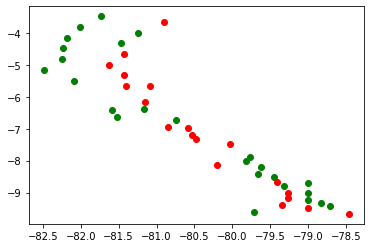

In [ ]:
for ii in range(len(EP)):
  if np.array(reindx['MUESTRA (número de ejemplares-Anchoveta)'][ii])==0:
    plt.plot(reindx['longitud\n(decimal)'][ii], reindx['latitud\n(decimal)'][ii],linewidth=0, marker='o', color='green')
  else:
    plt.plot(reindx['longitud\n(decimal)'][ii], reindx['latitud\n(decimal)'][ii],linewidth=0, marker='o', color='red')

plt.plot(reindx['longitud\n(decimal)'][ii], reindx['latitud\n(decimal)'][ii],linewidth=1,)

LOMAS
TASA 32
TASA 427
GUANAY
POLAR VI
CASACA
REGION CHAVIN IV


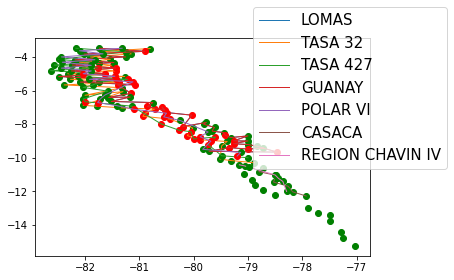

In [ ]:
barcos=df['NAVE'].unique()

for kk in range(0,len(barcos),1):
  plt.plot(reindx['longitud\n(decimal)'], reindx['latitud\n(decimal)'],linewidth=1, label=barcos[kk])
  print(barcos[kk])
  EP= df[df['NAVE'] == barcos[kk]]
  reindx=EP.reset_index(drop=True)
  for ii in range(len(EP)):
    if np.array(reindx['MUESTRA (número de ejemplares-Anchoveta)'][ii])==0:
      plt.plot(reindx['longitud\n(decimal)'][ii], reindx['latitud\n(decimal)'][ii],linewidth=0, marker='o', color='green') #Sin anchoveta
    else:
      plt.plot(reindx['longitud\n(decimal)'][ii], reindx['latitud\n(decimal)'][ii],linewidth=0, marker='o', color='red') #Con Anchoveta

plt.legend(loc=[0.65,0.4] ,prop={'size': 15})

In [ ]:
#Filtramos solo Guanay
#greater_than = df[df['Sales'] > 300]
# Guanay= df[df['NAVE'] == 'GUANAY']
# Guanay
#df[(df['Nave'] = Guanay) & (df['Units'] > 20)]
#df['MUESTRA (número de ejemplares-Anchoveta)'].fillna(0)
df.loc[df['MUESTRA (número de ejemplares-Anchoveta)']==0, 'MUESTRA (número de ejemplares-Anchoveta)']=np.nan
#df2.loc[df2['Weight'] == 0,'Weight'] = np.nan
df

,EMPRESA,NAVE,dato,N° DE CALA,FECHA DE CALA,HORA DE CALA\nINICIO,HORA DE CALA\nFINAL,TSM (°C),DC,CAPTURA\ndeclarada(T),longitud\n(decimal),latitud\n(decimal),LATITUD PROM,MUESTRA (número de ejemplares-Anchoveta)
0,HAYDUK,LOMAS,25.0,1,2022-02-18,11:04:00,12:28:00,NaN,18.0,NaN,-80.800000,-3.500000,4,NaN
1,HAYDUK,LOMAS,25.0,2,2022-02-18,19:41:00,21:42:00,NaN,50.0,NaN,-81.683333,-3.666667,4,NaN
2,HAYDUK,LOMAS,25.0,3,2022-02-19,09:24:00,10:40:00,NaN,20.0,NaN,-81.150000,-3.816667,4,NaN
3,HAYDUK,LOMAS,25.0,4,2022-02-19,17:53:00,19:35:00,NaN,55.0,NaN,-81.900000,-4.000000,4,NaN
4,HAYDUK,LOMAS,25.0,5,2022-02-20,05:39:00,07:57:00,NaN,28.0,NaN,-81.533333,-4.150000,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,CENTINELA,REGION CHAVIN IV,NaN,9,2022-03-12,18:55:00,20:28:00,21.1,75.0,0.0,-77.483333,-13.383333,13,NaN
150,CENTINELA,REGION CHAVIN IV,NaN,10,2022-03-13,06:10:00,07:57:00,20.7,75.3,0.0,-77.500000,-13.783333,14,NaN
151,CENTINELA,REGION CHAVIN IV,NaN,11,2022-03-13,17:29:00,19:07:00,21.5,77.7,0.0,-77.283333,-14.433333,14,NaN
152,CENTINELA,REGION CHAVIN IV,NaN,12,2022-03-15,00:05:00,01:20:00,22.1,88.0,0.0,-77.250000,-14.800000,15,NaN


Text(0.5, 1.0, 'MUESTRA (número de ejemplares-Anchoveta)')

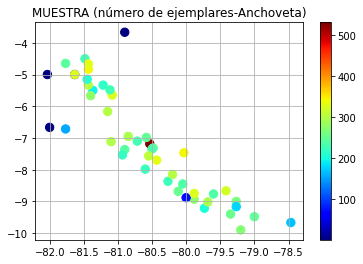

In [ ]:
#plt.bar(df['MUESTRA (número de ejemplares-Anchoveta)'],df['latitud\n(decimal)'])
#df.plot.scatter(x=df['longitud\n(decimal)'],y=df['latitud\n(decimal)'])#, c=df['MUESTRA (número de ejemplares-Anchoveta)'])
sc=plt.scatter(df['longitud\n(decimal)'],df['latitud\n(decimal)'],c=df['MUESTRA (número de ejemplares-Anchoveta)'],
               vmin=np.nanmin(df['MUESTRA (número de ejemplares-Anchoveta)']), vmax=np.nanmax(df['MUESTRA (número de ejemplares-Anchoveta)']),s=70, cmap='jet')
            
plt.colorbar(sc)
plt.grid()
plt.title('MUESTRA (número de ejemplares-Anchoveta)')

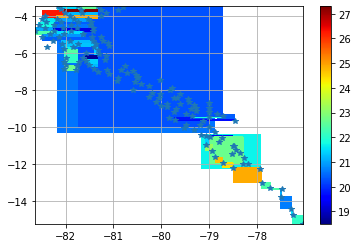

In [ ]:
temp=np.array(df['TSM (°C)'])
temp.shape
# a = np.array([1, 2, 3, 2, 1 ,2]).reshape(1,-1)
# b = np.diagonal((a)*(a).T)
#tempi=temp.ravel()
#arr[arr == 0] = 'nan'
tempi=np.diag(temp)
tempi[tempi==0] = 'nan'

loni,lati =np.meshgrid(df['longitud\n(decimal)'],df['latitud\n(decimal)'])
plt.pcolormesh(loni,lati,tempi,cmap='jet')
plt.plot(df['longitud\n(decimal)'],df['latitud\n(decimal)'],linewidth=0, marker='*')
plt.colorbar()
plt.grid()

In [ ]:
from scipy.interpolate import interp2d
from scipy import interpolate
print(temp)

[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan 20.4  21.6  22.   21.8  20.6  21.5  26.3  21.6  21.7
 21.8  21.1  22.4  22.3  22.15 21.54 22.12 21.7  22.5  22.1  23.26 22.7
 21.5  21.33 21.12 21.14 21.7  20.6  21.8  22.1  20.3  22.6  27.3  21.2
 24.9  21.   20.4  20.6  19.3  21.5  20.9  20.4  21.24 21.3  19.   21.37
 18.7  22.6  21.4  21.2  19.7  21.4  19.5  20.4  19.1  18.9  20.6  18.5
 19.3  19.1  19.5  19.6  19.8  19.5  19.5  21.2  19.8  20.7  20.5  20.4
 19.7  19.8  21.8  22.   20.3    nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan 20.3  21.6  21.1  23.9
 22.4  22.9  21.7  21.4  19.4  21.   22.4  23.   22.7  21.4  23.2  22.5
 24.7  24.4  24.9  22.4  22.4  21.1  20.7  21.5  22.1  23.2 ]


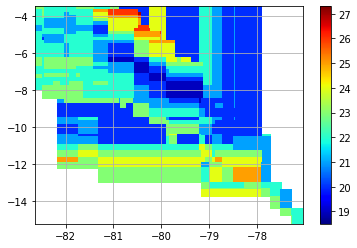

In [ ]:
#W=[-83:0.01:-80]
#Grid
# W=np.arange(-83,-80,0.01)
# S=np.arange(-3,-9,0.01)

lo,la=df['longitud\n(decimal)'],df['latitud\n(decimal)']
xx,yy=np.meshgrid(lo,la)
#Interpolation
tempis=np.ma.masked_invalid(temp)
tempis2= tempis[~tempis.mask]

x12=np.array(lo[~tempis.mask])
y12=np.array(la[~tempis.mask])

GD2=interpolate.griddata((x12,y12),tempis2.ravel(),(xx,yy),
                         method='linear')

plt.pcolormesh(lo,la,GD2,vmin=np.min(tempis2), vmax=np.max(tempis2), cmap='jet', shading='flat')
plt.grid()
plt.colorbar()

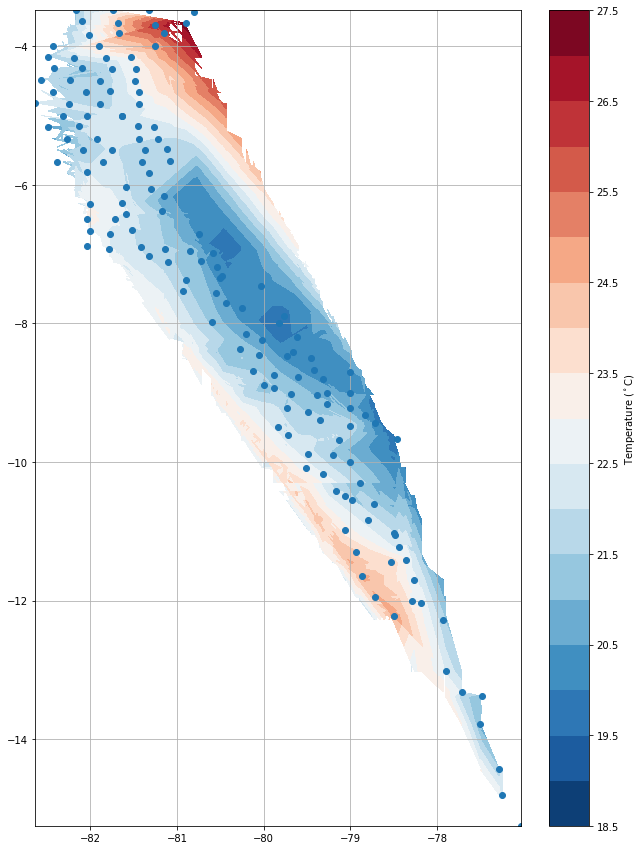

In [ ]:
vmin=np.nanmin(GD2)
vmax=np.nanmax(GD2)

fig,ax= plt.subplots(figsize=(10,15))
contours= plt.contourf(lo, la, GD2,levels=18,cmap="RdBu_r")
plt.plot(lo,la,linewidth=0, marker='o')
cb = plt.colorbar(contours, pad=0.05, orientation='vertical', fraction=0.08)
cb.ax.locator_params(nbins=len(np.arange(17,vmax,0.5)))
cb.ax.tick_params(direction='out')
cb.set_label('Temperature ($^\circ$C)')

#contour2= plt.contour(lo, la, GD2,levels=[15,20,22,25,27,29,30],colors='white',linewidths=0.1)
#plt.clabel(contour2, inline=True,fmt = '%2.0f',fontsize=5)
plt.grid()

In [ ]:
# extent = np.nanmin(loni), np.nanmax(loni), np.nanmin(lati), np.nanmax(lati)
# plt.imshow(loni,lati,tempi, cmap ="jet", 
#            interpolation ='nearest',
#            extent = extent, alpha = 1)

In [ ]:
a = np.array([1,2,3,4])
d = np.diag(a)
# or simpler: d = np.diag([1,2,3,4])
type(a)
#print(d)

numpy.ndarray

In [ ]:
df['MUESTRA (número de ejemplares-Anchoveta)'].describe()

count     48.000000
mean     243.229167
std       97.091806
min        1.000000
25%      218.750000
50%      249.000000
75%      302.000000
max      532.000000
Name: MUESTRA (número de ejemplares-Anchoveta), dtype: float64

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
 
  
# # creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
# courses = list(data.keys())
# values = list(data.values())
  
# fig = plt.figure(figsize = (10, 5))
 
# # creating the bar plot
# plt.bar(courses, values, color ='maroon',
#         width = 0.4)
 
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show()

#Puertos del Peru

In [ ]:
Puertos = {
    "Inglés": [-17.65611111,	-71.35083333],
    "Ilo": [-17.64138889,	-71.34777778],
    "Pacocha":[-17.28,	-71.34333333],
    "Mollendo":	[-17.03722222,	-72.00416667],
    #"Matarani":	[-16.99583333,	-72.105],
    "Quilca":	[-16.71166667,	-72.43333333],
    "La Planchada":	[-16.40472222,	-73.21277778],
    "Camana": 	[-16.64722222,	-72.70055556],
    "Ilo":	[-17.63388889,	-71.33944444],
    "M. Sama":	[-17.97166667,	-70.89027778],
    "L. Palos":	[-18.27638889,	-70.47555556],
    "Atico":	[-16.22388889,	-73.69916667],
    "Chala":	[-15.81555556,	-74.42166667],
    "Punta Infiernillos":	[-14.52,	-75.9],
    "Punta Caballa":	[-14.94972222,	-75.49833333],
    "San Juan":	[-15.36638889, -75.17055556],
    #"Lomas":	[-15.55777778,	-74.85],
    "San Juan":	[-15.34888889,	-75.16027778],
    "San Nicolás":	[-15.25,	-75.24166667],
    "Bahia Independencia": [-14.2522222222222, -76.1347222222222],
    "General San Martín":	[-13.8,	-76.28916667],
    "Pisco":	[-13.69388889,	-76.22416667],
    "Tambo de Mora":[-13.455,	-76.18972222],
    "Cerro Azul":	[-13.02055556,	-76.48555556],
    #"Bujama":	[-12.7225,	-77.62944444],
    "Pucusana":[-12.4977777777778,  -76.7952777777778],
    "Chorrillos":[-12.15638889,	-77.03194444],
    "Callao":	[-12.0575,	-77.15305556],
    "Ancón":	[-11.76416667,	-77.17694444],
    "Chancay":	[-11.575,	-77.27361111],
    "Huacho":	[-11.11055556,	-77.62027778],
    #"Carquín":	[-11.08166667,	-77.63333333],
    "Vegeta":	[-11,	-77.675],
    "Supe":	[-11.4758333333333,	-77.50],
    "Barranca":[-10.76222222,	-77.76583333],
    "Punta Bermejo":[-10.4730555555556, -77.9661111111111],
    "Las Zorras":[-10.2686111111111, -78.0788888888889],
    "Huarmey":[-10.08916667,	-78.17166667],
    "Culebras"	:[-9.945,	-78.23333333],
    #"Tortugas":	[-9.337777778,	-77.405],
    "Samanco":	[-9.237777778,	-78.50277778],
    "Chimbote":	[-9.076666667,	-78.61472222],
    #"Santa":	[-8.977777778,	-78.65333333],
    "Punta Chao":[-8.74138888888889,-78.7497222222222],
    "Coscobamba":	[-8.656944444,	-78.76111111],
    "Casma"	:[-9.43694444444444,	-78.385],
    "Guañape":	[-8.416666667,	-78.89388889],
    "Salaverry":	[-8.224444444,	-78.98166667],
    "Huanchaco":	[-8.073333333,	-79.12333333],
    "Chicama"	:[-7.703611111,	-79.45916667],
    "Pacasmayo":[-7.386944444,	-79.58833333],
    "Chérrepe":	[-7.153333333,	-79.70166667],
    #"Lagunas":[-7.088333333,	-79.73055556],
    "Eten":	[-6.943333333,	-79.87972222],
    #"Santa Rosa":	[-6.896666667,	-79.94166667],
    "Pimentel":	[-6.847777778,	-79.95583333],
    #"San José":	[-6.798333333,	-79.99166667],
    "Morrope":[-6.55027777777778,-80.2438888888889],
    "Punta La Negra":[-5.98,-81.1491666666667],
    "Mancora":	[-5.79,	-81.06083333],
    "Parachique":[-5.67,-80.838333],
    "Sechura":[-5.55694,-80.82222],
    "Punta Gobernador":[-5.3144,-81.1050],
    "Paita":	[-5.078055556,	-81.10638889],
    "Negritos":	[-4.644166667,	-81.32222222],
    #"Talara":	[-4.570277778,	-81.27972222],
    "Lobitos":	[-4.4375,	-81.28416667],
    "Cabo Blanco":	[-4.242777778,	-81.22888889],
    "Los Órganos":	[-4.171944444,	-81.13333333],
    "Cancas":	[-3.943611111,	-80.94388889],
    "Zorritos":	[-3.685277778,	-80.67138889],
    "Puerto Pizarro":	[-3.513055556,	-80.40333333]
    }


In [ ]:
area_centro=[-87,-69, -20, -1]
mp = Basemap(projection ='merc',
             llcrnrlon=int(area_centro[0]),
             llcrnrlat=int(area_centro[2]),
             urcrnrlon=int(area_centro[1]),
             urcrnrlat=int(area_centro[3]),
             resolution='i')

#loni,lati = np.meshgrid(lon,lat)

In [ ]:
for key in Puertos:
  x,y = mp(Puertos[key][1],Puertos[key][0])
  

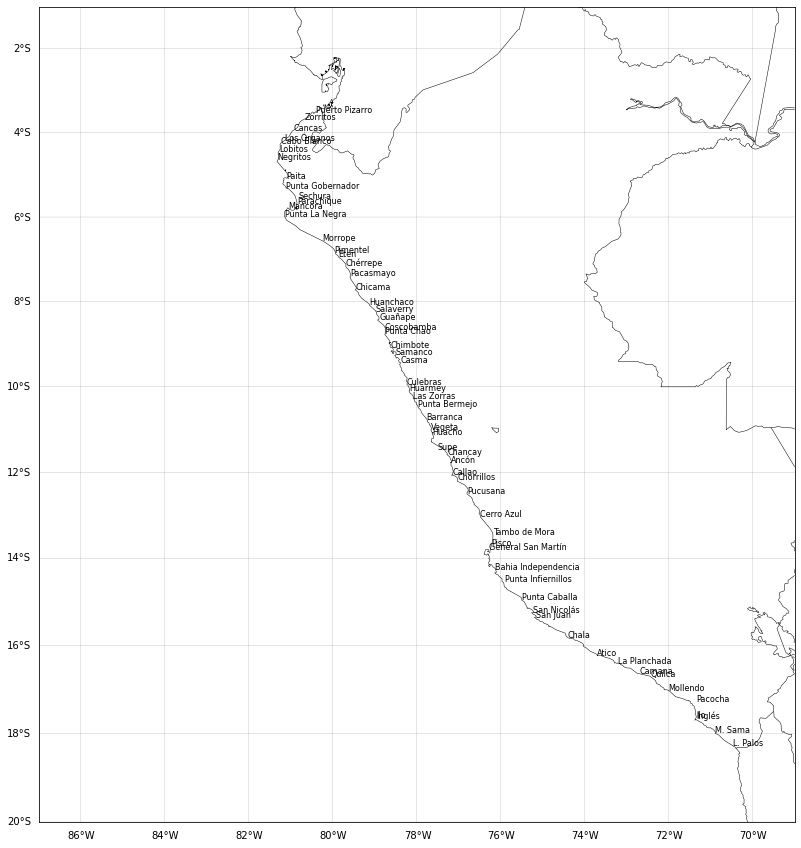

In [ ]:
fig=plt.figure(figsize=(20,15))
#x,y = mp(loni,lati)
for key in Puertos:
  x,y = mp(Puertos[key][1],Puertos[key][0])
  #plt.plot(x,y,'o', color='black',markersize=2)
  plt.text(x,y,key,fontsize=8)

mp.drawcoastlines(linewidth=0.5)
mp.drawcountries()
mp.drawparallels(np.arange(-20,5,2),labels=[1,0,0,0],linewidth='0.2')
mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2')
#mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
#mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

plt.show()

In [ ]:
Puertos = {
    # "Inglés": [-17.65611111,	-71.35083333],
    # "Ilo": [-17.64138889,	-71.34777778],
    # "Pacocha":[-17.28,	-71.34333333],
    # "Mollendo":	[-17.03722222,	-72.00416667],
    # #"Matarani":	[-16.99583333,	-72.105],
    # "Quilca":	[-16.71166667,	-72.43333333],
    # "La Planchada":	[-16.40472222,	-73.21277778],
    # "Camana": 	[-16.64722222,	-72.70055556],
    # "Ilo":	[-17.63388889,	-71.33944444],
    # "M. Sama":	[-17.97166667,	-70.89027778],
    # "L. Palos":	[-18.27638889,	-70.47555556],
    # "Atico":	[-16.22388889,	-73.69916667],
    # "Chala":	[-15.81555556,	-74.42166667],
    # "Punta Infiernillos":	[-14.52,	-75.9],
    # "Punta Caballa":	[-14.94972222,	-75.49833333],
    # "San Juan":	[-15.36638889, -75.17055556],
    # #"Lomas":	[-15.55777778,	-74.85],
    # "San Juan":	[-15.34888889,	-75.16027778],
    # "San Nicolás":	[-15.25,	-75.24166667],
    # "Bahia Independencia": [-14.2522222222222, -76.1347222222222],
    # "General San Martín":	[-13.8,	-76.28916667],
    # "Pisco":	[-13.69388889,	-76.22416667],
    # "Tambo de Mora":[-13.455,	-76.18972222],
    # "Cerro Azul":	[-13.02055556,	-76.48555556],
    # #"Bujama":	[-12.7225,	-77.62944444],
    # "Pucusana":[-12.4977777777778,  -76.7952777777778],
    # "Chorrillos":[-12.15638889,	-77.03194444],
    # "Callao":	[-12.0575,	-77.15305556],
    # "Ancón":	[-11.76416667,	-77.17694444],
    # "Chancay":	[-11.575,	-77.27361111],
    # "Huacho":	[-11.11055556,	-77.62027778],
    # #"Carquín":	[-11.08166667,	-77.63333333],
    # "Vegeta":	[-11,	-77.675],
    # "Supe":	[-11.4758333333333,	-77.50],
    # "Barranca":[-10.76222222,	-77.76583333],
    # "Punta Bermejo":[-10.4730555555556, -77.9661111111111],
    # "Las Zorras":[-10.2686111111111, -78.0788888888889],
    # "Huarmey":[-10.08916667,	-78.17166667],
    "Culebras"	:[-9.945,	-78.23333333],
    #"Tortugas":	[-9.337777778,	-77.405],
    "Samanco":	[-9.237777778,	-78.50277778],
    "Chimbote":	[-9.076666667,	-78.61472222],
    #"Santa":	[-8.977777778,	-78.65333333],
    "Punta Chao":[-8.74138888888889,-78.7497222222222],
    "Coscobamba":	[-8.656944444,	-78.76111111],
    "Casma"	:[-9.43694444444444,	-78.385],
    "Guañape":	[-8.416666667,	-78.89388889],
    "Salaverry":	[-8.224444444,	-78.98166667],
    "Huanchaco":	[-8.073333333,	-79.12333333],
    "Chicama"	:[-7.703611111,	-79.45916667],
    "Pacasmayo":[-7.386944444,	-79.58833333],
    "Chérrepe":	[-7.153333333,	-79.70166667],
    #"Lagunas":[-7.088333333,	-79.73055556],
    "Eten":	[-6.943333333,	-79.87972222],
    #"Santa Rosa":	[-6.896666667,	-79.94166667],
    "Pimentel":	[-6.847777778,	-79.95583333],
    #"San José":	[-6.798333333,	-79.99166667],
    "Morrope":[-6.55027777777778,-80.2438888888889],
    "Punta La Negra":[-5.98,-81.1491666666667],
    "Mancora":	[-5.79,	-81.06083333],
    "Parachique":[-5.67,-80.838333],
    "Sechura":[-5.55694,-80.82222],
    "Punta Gobernador":[-5.3144,-81.1050],
    "Paita":	[-5.078055556,	-81.10638889],
    "Negritos":	[-4.644166667,	-81.32222222],
    #"Talara":	[-4.570277778,	-81.27972222],
    "Lobitos":	[-4.4375,	-81.28416667],
    "Cabo Blanco":	[-4.242777778,	-81.22888889],
    "Los Órganos":	[-4.171944444,	-81.13333333],
    "Cancas":	[-3.943611111,	-80.94388889],
    "Zorritos":	[-3.685277778,	-80.67138889],
    "Puerto Pizarro":	[-3.513055556,	-80.40333333]
    }

In [ ]:
area_centro=[-83,-75, -16, -2]
mp = Basemap(projection ='merc',
             llcrnrlon=int(area_centro[0]),
             llcrnrlat=int(area_centro[2]),
             urcrnrlon=int(area_centro[1]),
             urcrnrlat=int(area_centro[3]),
             resolution='i')

In [ ]:
# contours= plt.contourf(lo, la, GD2,levels=20,cmap="RdBu_r")
# plt.plot(lo,la,linewidth=0, marker='o')
# cb = plt.colorbar(contours, pad=0.05, orientation='vertical', fraction=0.08)
# cb.ax.locator_params(nbins=len(np.arange(17,vmax,0.5)))
# cb.ax.tick_params(direction='out')
# cb.set_label('Temperature ($^\circ$C)')

x2,y2 = mp(np.array(lo),np.array(la))

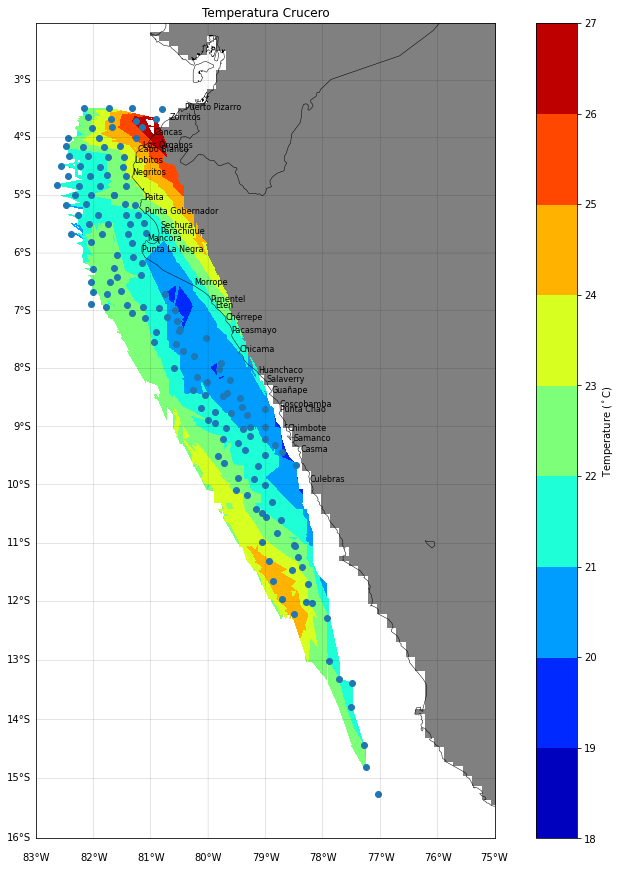

In [ ]:
fig=plt.figure(figsize=(10,15))
#x,y = mp(loni,lati)
for key in Puertos:
  x,y = mp(Puertos[key][1],Puertos[key][0])
  #plt.plot(x,y,'o', color='black',markersize=2)
  plt.text(x,y,key,fontsize=8)

bb=plt.contourf(x2,y2,np.round(GD2),levels=10,cmap="jet")
plt.plot(x2,y2,linewidth=0, marker='o')
# bb = plt.colorbar(contours, pad=-1.8, orientation='vertical', fraction=0.08)
bb = plt.colorbar(bb, orientation='vertical', fraction=0.08)
bb.ax.locator_params(nbins=len(np.arange(10,vmax,1)))
bb.ax.tick_params(direction='out')
bb.set_label('Temperature ($^\circ$C)')
plt.title('Temperatura Crucero')

mp.drawcoastlines(linewidth=0.5)
mp.drawcountries()
mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2')
mp.drawmeridians(np.arange(-88,-65,1),labels=[0,0,0,1],linewidth='0.2')
mp.drawlsmask(land_color='gray')
#mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
#mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

# plt.savefig('Temperatura_crucero'+'.png',
#     format='png', dpi=300, transparent=False)

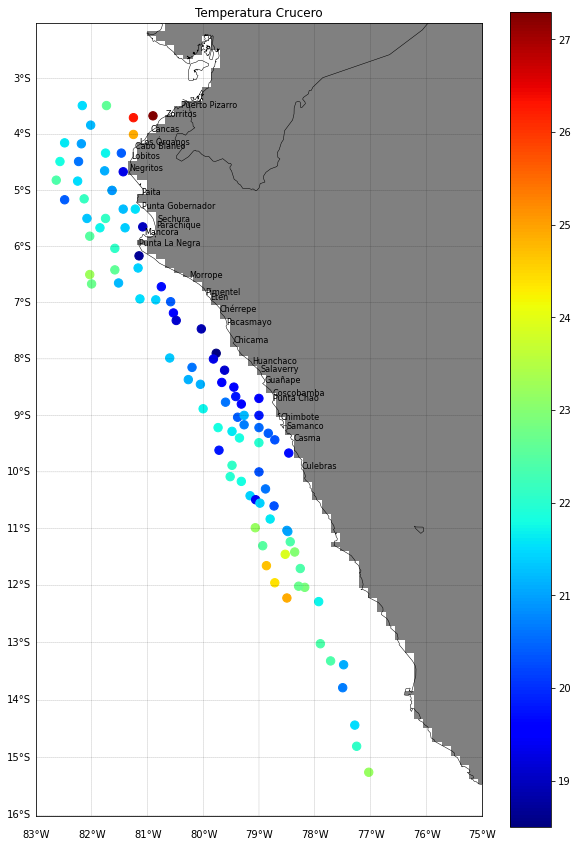

In [ ]:
fig=plt.figure(figsize=(10,15))
#x,y = mp(loni,lati)
for key in Puertos:
  x,y = mp(Puertos[key][1],Puertos[key][0])
  #plt.plot(x,y,'o', color='black',markersize=2)
  plt.text(x,y,key,fontsize=8)

sc=plt.scatter(x2,y2,
               c=df['TSM (°C)'],
               vmin=np.nanmin(df['TSM (°C)']), vmax=np.nanmax(df['TSM (°C)']),s=70, cmap='jet')
            
plt.colorbar(sc)
plt.grid()
plt.title('MUESTRA (número de ejemplares-Anchoveta)')

#bb=plt.contourf(x2,y2,GD2,levels=20,cmap="jet")
# plt.plot(x2,y2,linewidth=0, marker='o')
# bb = plt.colorbar(contours, pad=-1.8, orientation='vertical', fraction=0.08)
# bb = plt.colorbar(bb, orientation='vertical', fraction=0.08)
# bb.ax.locator_params(nbins=len(np.arange(15,vmax,1)))
# bb.ax.tick_params(direction='out')
# bb.set_label('Temperature ($^\circ$C)')
plt.title('Temperatura Crucero')

mp.drawcoastlines(linewidth=0.5)
mp.drawcountries()
mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2')
mp.drawmeridians(np.arange(-88,-65,1),labels=[0,0,0,1],linewidth='0.2')
mp.drawlsmask(land_color='gray')
#mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
#mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

# plt.savefig('Temperatura_crucero'+'.png',
#     format='png', dpi=300, transparent=False)